<a href="https://colab.research.google.com/github/harshitha020505/MLLab1/blob/main/MLASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns











In [ ]:

#  Load Dataset

iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:


# 3 Random Forest - Before Tuning

rf = RandomForestClassifier(max_depth=2,random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_acc_before = accuracy_score(y_test, rf_pred)
rf_cv_before = np.mean(cross_val_score(rf, X, y, cv=5))

print("Random Forest Accuracy (Before Tuning):", rf_acc_before)
print("Random Forest CV Score (Before Tuning):", rf_cv_before)

Random Forest Accuracy (Before Tuning): 1.0
Random Forest CV Score (Before Tuning): 0.9466666666666665


In [ ]:

# 4Random Forest - After Tuning

param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 5, None],
    'criterion': ['gini', 'entropy']
}
grid_rf = GridSearchCV(rf, param_rf, cv=5)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

rf_pred_tuned = best_rf.predict(X_test)
rf_acc_after = accuracy_score(y_test, rf_pred_tuned)
rf_cv_after = np.mean(cross_val_score(best_rf, X, y, cv=5))

print("\nRandom Forest Accuracy (After Tuning):", rf_acc_after)
print("Random Forest CV Score (After Tuning):", rf_cv_after)
print("Best RF Params:", grid_rf.best_params_)



Random Forest Accuracy (After Tuning): 1.0
Random Forest CV Score (After Tuning): 0.9666666666666668
Best RF Params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 50}


In [ ]:

# 5️ Gradient Boosting - Before Tuning

gb = GradientBoostingClassifier(learning_rate=0.01,max_depth=1,random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

gb_acc_before = accuracy_score(y_test, gb_pred)
gb_cv_before = np.mean(cross_val_score(gb, X, y, cv=5))

print("\nGradient Boosting Accuracy (Before Tuning):", gb_acc_before)
print("Gradient Boosting CV Score (Before Tuning):", gb_cv_before)


Gradient Boosting Accuracy (Before Tuning): 1.0
Gradient Boosting CV Score (Before Tuning): 0.9466666666666665


In [ ]:

# 6️Gradient Boosting - After Tuning

param_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 5]
}
grid_gb = GridSearchCV(gb, param_gb, cv=5)
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_

gb_pred_tuned = best_gb.predict(X_test)
gb_acc_after = accuracy_score(y_test, gb_pred_tuned)
gb_cv_after = np.mean(cross_val_score(best_gb, X, y, cv=5))

print("\nGradient Boosting Accuracy (After Tuning):", gb_acc_after)
print("Gradient Boosting CV Score (After Tuning):", gb_cv_after)
print("Best GB Params:", grid_gb.best_params_)


Gradient Boosting Accuracy (After Tuning): 1.0
Gradient Boosting CV Score (After Tuning): 0.96
Best GB Params: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}


In [ ]:

# 7️ Voting Classifier (Using Tuned Models)

voting = VotingClassifier(
    estimators=[('rf', best_rf), ('gb', best_gb)],
    voting='hard'
)
voting.fit(X_train, y_train)
vote_pred = voting.predict(X_test)
vote_acc = accuracy_score(y_test, vote_pred)
vote_cv = np.mean(cross_val_score(voting, X, y, cv=5))

print("\nVoting Classifier Accuracy (Using Tuned Models):", vote_acc)
print("Voting Classifier CV Score:", vote_cv)
print("\nClassification Report for Voting Classifier:\n", classification_report(y_test, vote_pred))



Voting Classifier Accuracy (Using Tuned Models): 1.0
Voting Classifier CV Score: 0.9666666666666668

Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



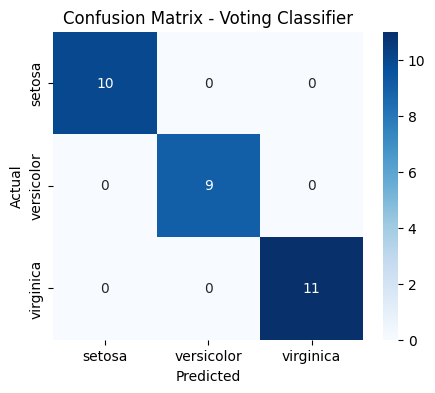

In [ ]:

# 8️ Confusion Matrix for Voting Classifier

cm = confusion_matrix(y_test, vote_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


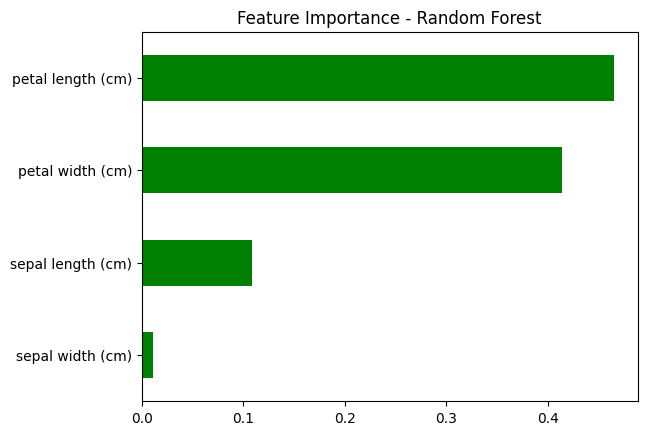

In [ ]:



# 9️ Feature Importance (Random Forest)

feat_importances = pd.Series(best_rf.feature_importances_, index=iris.feature_names)
feat_importances.sort_values().plot(kind='barh', color='green')
plt.title("Feature Importance - Random Forest")
plt.show()

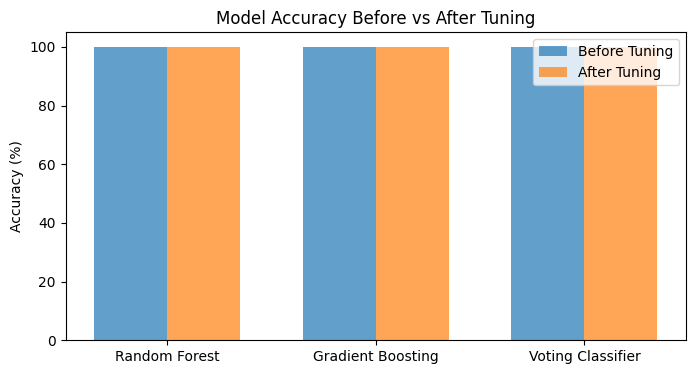

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Random Forest', 'Gradient Boosting', 'Voting Classifier']
before = [rf_acc_before*100, gb_acc_before*100, np.mean([rf_acc_before*100, gb_acc_before*100])]
after = [rf_acc_after*100, gb_acc_after*100, vote_acc*100]

x = np.arange(len(models))  # the label locations
width = 0.35  # width of the bars

plt.figure(figsize=(8,4))

plt.bar(x - width/2, before, width, label='Before Tuning', alpha=0.7)
plt.bar(x + width/2, after, width, label='After Tuning', alpha=0.7)

plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Before vs After Tuning')
plt.xticks(x, models)
plt.legend()
plt.show()
